### Name: Dhruv Singhal
### Roll No. 18CY20010

### Import Libraries

In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as implt

### Import Image

In [61]:
im = Image.open('E:/Machine Learning Course/lab_assignment_1/images/10.jpg')

In [62]:
img = cv2.imread('E:/Machine Learning Course/lab_assignment_1/images/10.jpg',cv2.IMREAD_COLOR)

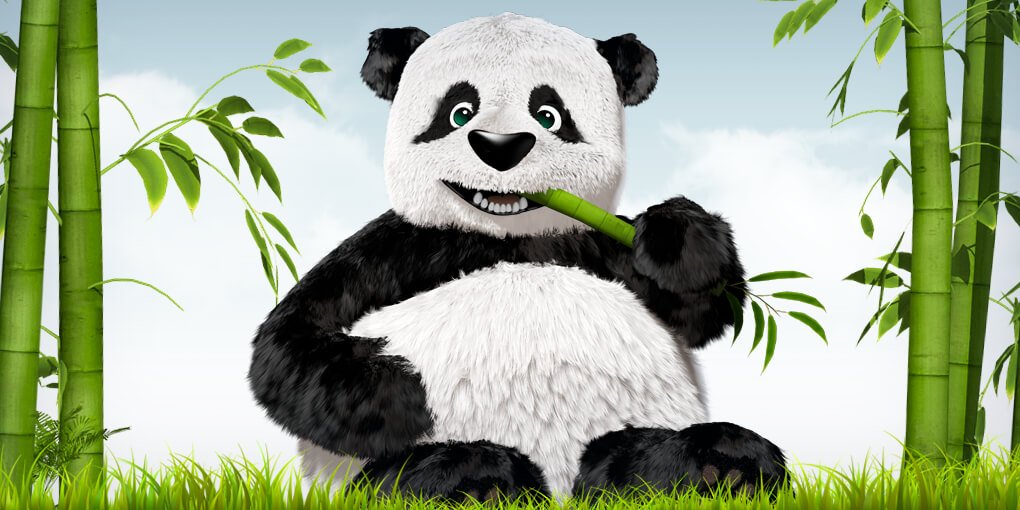

In [63]:
im

### Adding Noise To Image

In [64]:
k=0
w,h,r = img.shape
for i in range (20000):
    b = random.randint(0,255)
    g = random.randint(0,255)
    r = random.randint(0,255)

    r1 = random.randint(0, w-1)
    r2 = random.randint(0, h-1)

    img[r1,r2] = (r,b,g)
    k=k+1

In [65]:
p = Image.fromarray(img)

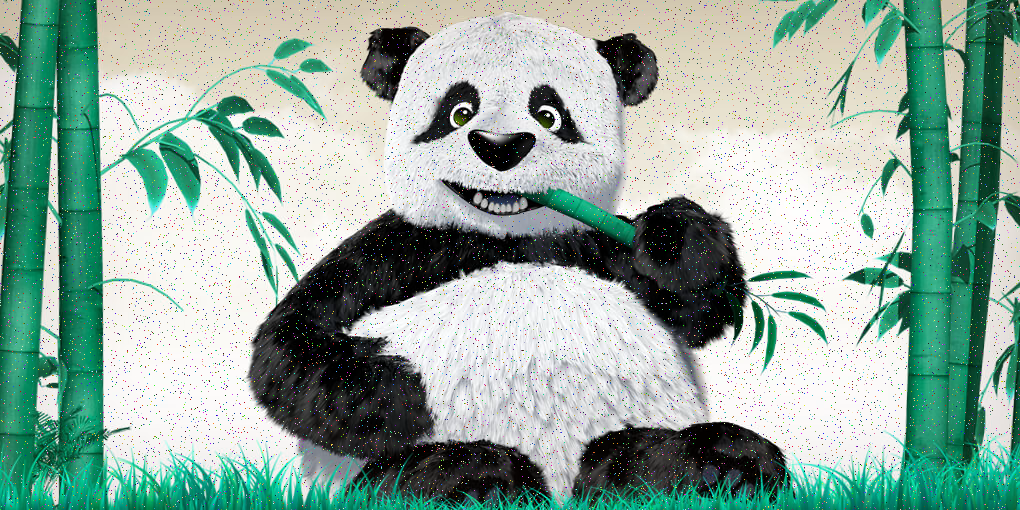

In [66]:
p

### Saving Image

In [67]:
p.save('E:/Machine Learning Course/lab_assignment_1/images/10noise.jpg')

### Importing Noised Image

In [68]:
im_noise = Image.open('E:/Machine Learning Course/lab_assignment_1/images/10noise.jpg')

In [69]:
img_noisy1 = cv2.imread('E:/Machine Learning Course/lab_assignment_1/images/10noise.jpg',cv2.IMREAD_COLOR)


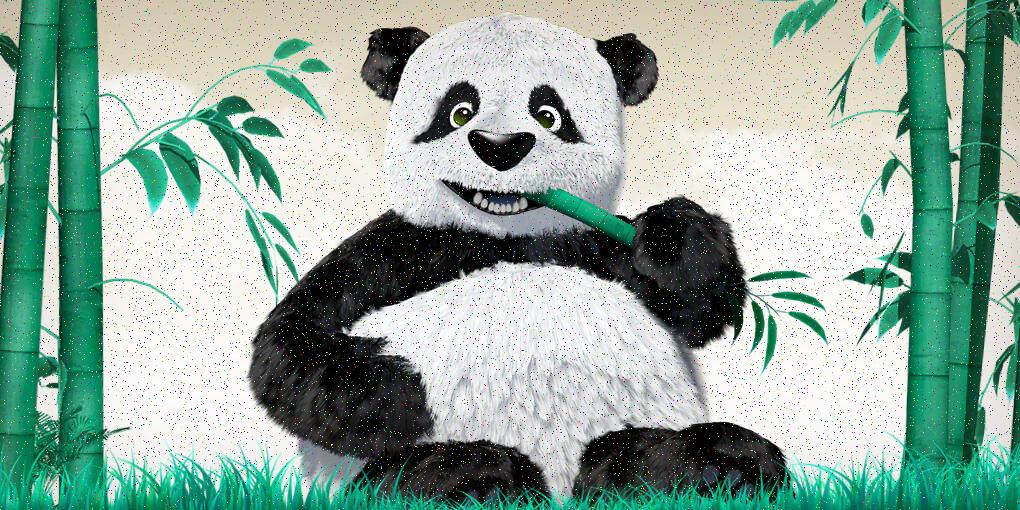

In [70]:
im_noise

### Detecting Noiced Pixel

The Intensity of particular pixel is R*0.21, G*0.72 and B*0.07 so we found the intensity of all pixels in images.

In [71]:
# Obtain intensity for RGB value
# of the image 
m, n, q = img_noisy1.shape 
   
# Traverse the image. For every 3X3 area,  

intensity = np.zeros([m,n]) 
  
for i in range(1, m-1): 
    for j in range(1, n-1):
        intensity[i,j] = img_noisy1[i, j,0]*0.21 + img_noisy1[i, j,1]*0.72 + img_noisy1[i, j,2]*0.07       

The most intensed pixel from sliding window is removed by comparing with average.

In [72]:
# to app find the noicyyy pixels
#meine randomly ek 3 by 3 ka square consider kiya tha 100,100 par fir waha pixel ki value dekhi aur observe kiya ki jo same colour ke pixels and unki value me zada diff nhi hai buttttt jo noicy pixel hoga usme aur consecutive pixels ki values me bhuttt diff tha
# due to this observation I have put this condition of > 0.08 (Obviously it is app solution)
m,n = intensity.shape
b = []
a= []
for i in range(1,m-1):
    for j in range(1,n-1):
        if(intensity[i,j] > 1.5*((intensity[i-1,j-1]+intensity[i-1,j]+intensity[i-1,j+1]+intensity[i,j-1]+intensity[i,j+1]+intensity[i+1,j-1]+intensity[i+1,j]+intensity[i+1,j+1])/8)):
            a.append(i)
            b.append(j)
        else:
            continue
        

In [57]:
len(a)

14711

### Denoiseing the image using median filter.

In [73]:
# Median Spatial Domain Filtering 
import cv2 
import numpy as np 
  
# Obtain the number of rows and columns  
# of the image 
m, n, q = img_noisy1.shape 
   
# Traverse the image. For every 3X3 area,  
# find the median of the pixels and 
# replace the ceter pixel by the median 
img_new1 = np.zeros([m, n,q]) 
  
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = [img_noisy1[i-1, j-1].tolist(), 
               img_noisy1[i-1, j].tolist(), 
               img_noisy1[i-1, j + 1].tolist(), 
               img_noisy1[i, j-1].tolist(), 
               img_noisy1[i, j].tolist(), 
               img_noisy1[i, j + 1].tolist(), 
               img_noisy1[i + 1, j-1].tolist(), 
               img_noisy1[i + 1, j].tolist(), 
               img_noisy1[i + 1, j + 1].tolist()] 
          
        temp = sorted(temp) 

        img_new1[i, j]= np.array(temp[4])

img_new1 = img_new1.astype(np.uint8)  

In [74]:
denoised = Image.fromarray(img_new1)

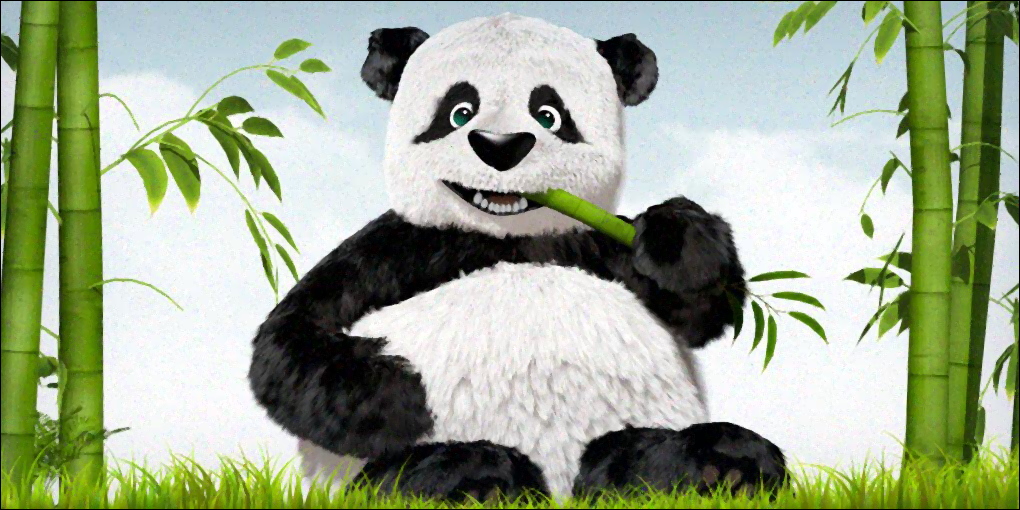

In [75]:
denoised

### Denoising the image using averaging filter

In [99]:
# Low Pass SPatial Domain Filtering and averaging
# to observe the blurring effect       
# Read the image 

  
# Obtain number of rows and columns  
# of the image 
m, n, q = img_noisy1.shape  
   
# Develop Averaging filter(3, 3) mask 
mask = np.ones([3, 3], dtype = int) 
mask = mask / 9
   
# Convolve the 3X3 mask over the image  
img_new = np.zeros([m, n,3]) 
  
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
         
        img_new[i, j]= (temp[0], temp[1] ,temp[2])
          
img_new = img_new.astype(np.uint8) 

In [101]:
denoised_mean = Image.fromarray(img_new)

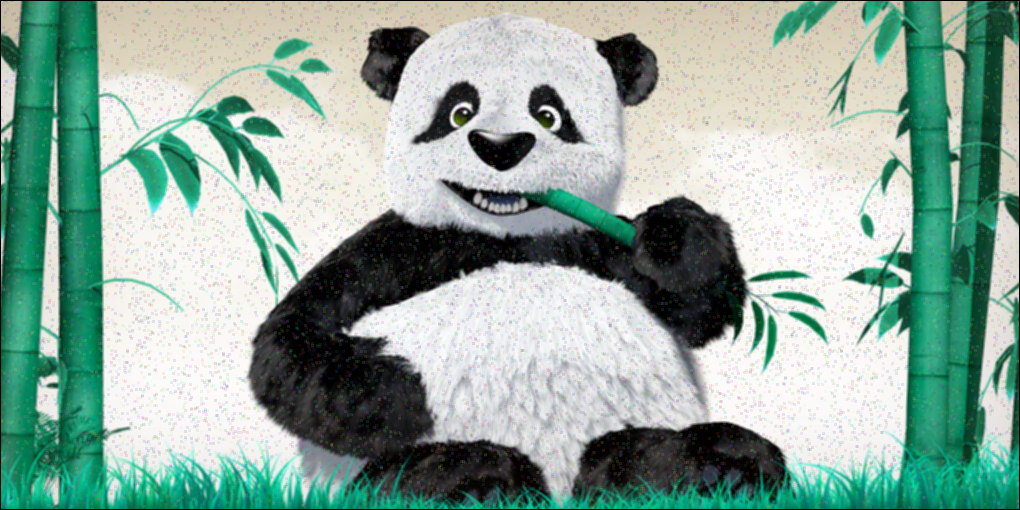

In [102]:
denoised_mean